## Project Goal

The aim of this project is to develop a fake news classification model using supervised learning with natural language processing (NLP) techniques.

The model is trained on a large dataset of labeled text data. The dataset  consist of news articles labeled as either real or fake. The model uses  techniques from NLP to identify patterns and relationships in the data.

The problem I am trying to solve is the detection of fake news.

## Supervised Learning

Supervised learning is a type of machine learning where a model is trained on labeled data. The goal is to learn a mapping from input variables (also known as features) to output variables (also known as labels) based on the examples in the training set. Once the model is trained, it can be used to make classifications on new, unseen data.

Classification is one of the 2 main types of supervised learning. In classification, the output variable is categorical, such as "FAKE" or "REAL" in our case.

## NLP and NLP Techniques

NLP is a branch of artificial intelligence that focuses on the interaction between computers and humans using natural language. It involves developing algorithms and techniques that can understand, analyze, and generate human language.

For the purpose of our project, the following NLP techniques are used.

- Tokenization
- Stop word removal
- Stemming and Lemmatization
- CountVectorizer for text classification with Python
- TfidfVectorizer for text classification with Python

## Supervised Learning with NLP

Supervised learning with NLP is a type of machine learning in which algorithms are trained on labeled data to classify new examples into one of the predefined categories (real or fake news, in this example) based on patterns and relationships in the training data. In the context of NLP, the data is usually in the form of text, such as news articles, social media posts, or other written content.


## Scientific Kit for Machine Learning

We will use Scikit learn to create features and train a model. Scikit-learn (short for "Scientific Kit for Machine Learning") is a free and open-source Python library for machine learning. It provides a wide range of tools and algorithms for supervised learning. Scikit-learn is built on top of other popular Python libraries such as NumPy and SciPy, and is designed to be easy to use and integrate with other scientific libraries.

Scikit-learn is a popular choice for machine learning tasks in Python, due to its ease of use, wide range of features, and strong community support.

## Supervised Learning steps

1. Collect and preprocess our data
2. Determine a lable
3. Split data into training and test sets
4. Feature engineering - extract features from the text to help predict the label
5. Train the model
6. Evaluate the trained model using the test set

## NLP Pipeline

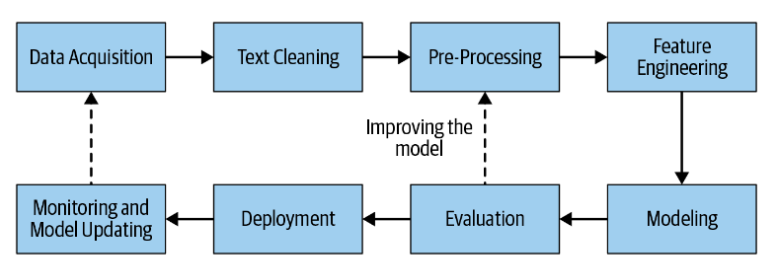


Image courtesy: Kaggle

This project focuses on stages from Data Acquisition to Model Evaluation.



## Dataset

The dataset fake_or_real_news.csv has been made publicly available for anyone to access.


In [1]:
# Import the necessary modules

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

from wordcloud import WordCloud
import matplotlib.pyplot as plt

Note:
    
Make sure to do all the imports in the first cell. The reason is that Python package import order is extraordinary broken and intertwined. Sometimes wrong import orders will result in dependency errors that will not get resolved.

Also, if imports are scattered throughout the notebook, users/reader of the code do not know what packages/dependencies are used in the notebook until they scroll down to the bottom. It can also be difficult to identify the source of an error, and it may lead to unnecessary debugging and troubleshooting.

Therefore, having all the imports in the first cell of the Jupyter notebook is a good practice that makes it easier to manage, debug, and reproduce the analysis.

numpy - for manipulating arrays

pandas - for data manipulation and analysis

train_test_split - for splitting a dataset into training and testing sets

CountVectorizer - to convert a collection of text documents into a matrix of token counts

TfidfVectorizer - to convert a collection of text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features

MultinomialNB - implements the Multinomial Naive Bayes algorithm

metrics - to evaluate the performance of the machine learning models

SVC - implements the Support Vector Machine (SVM) algorithm for classification tasks

RandomForestClassifier - implements the Random Forest algorithm for classification tasks

LogisticRegression - implements the Logistic Regression algorithm for binary and multi-class classification tasks

PassiveAggressiveClassifier -  implements the Passive Aggressive algorithm for binary classification tasks

WordCloud - generating word clouds, which are visual representations of text data where the size of each word corresponds to its frequency in the text

matplotlib.pyplot - for creating visualizations such as plots, charts, and graphs


In [2]:
# Load the dataset

fake_or_real_news = pd.read_csv('/Users/brindhamanivannan/NLP/Fake_News/fake_or_real_news.csv')

## EDA

In [3]:
fake_or_real_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
fake_or_real_news.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [5]:
fake_or_real_news.shape

(6335, 4)

In [6]:
fake_or_real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


The dataset has 6335 rows and 4 columns and there are no null values.

In [7]:
fake_or_real_news['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [8]:
print(fake_or_real_news['text'][3]) #fake

— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Democrats to start listening to the voters. Stop running the same establishment candidates. 
— People For Bernie (@People4Bernie) November 9, 2016 If Dems didn't want a tight race they shouldn't have worked against Bernie. 
— Walker Bragman (@WalkerBragman) November 9, 2016 
New York Times columnist Paul Krugman, who was one of Hillary Clinton’s most outspoken surrogates during the contentious Democratic primary, blamed Clinton’s poor performance on Green Party candidate Jill Stein, who has so far received a negligible number of votes nationally, saying Stein was the Ralph Nader of 2016 in preventing a Clinton victory. The account @BerniesTeachers threw Krugman’s analysis back in his face. Your candidate was the issue. Take responsibility. https://t.co/KHyOuUSrFS 
— Teachers for Bernie (@BerniesTeachers) November 9, 2016 
Ana Navarro, a Republican who recently endorsed Hillary Clinton, summed up

In [9]:
print(fake_or_real_news['text'][4]) #real

It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.

Trump is now vowing to win enough delegates to clinch the Republican nomination and prevent a contested convention. But Sens.Ted Cruz, R-Texas, Bernie Sanders, D-Vt., and Ohio Gov. John Kasich and aren't giving up just yet.

A big win in New York could tip the scales for both the Republican and Democratic front-runners in this year's race for the White House. Clinton and Trump have each suffered losses in recent contests, shifting the momentum to their rivals.

"We have won eight out of the last nine caucuses and primaries! Cheer!" Sanders recently told supporters.

While wins in New York for Trump and Clinton are expected, the margins of those victories are also important.

Trump needs to capture more than 50 percent of the vote statewide if he wants to be positioned to win all of the state's 95 GOP delegates. That would put him one step closer to avoiding a contested convention.

In [10]:
print(fake_or_real_news['title'][3]) #fake

Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'


In [11]:
print(fake_or_real_news['title'][4]) #real

The Battle of New York: Why This Primary Matters


## Word cloud

In [12]:
# Title column

fake_or_real_news['title'].head()

0                         You Can Smell Hillary’s Fear
1    Watch The Exact Moment Paul Ryan Committed Pol...
2          Kerry to go to Paris in gesture of sympathy
3    Bernie supporters on Twitter erupt in anger ag...
4     The Battle of New York: Why This Primary Matters
Name: title, dtype: object

In [13]:
fake_or_real_news['title'].tail()

6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, dtype: object

In [14]:
# Create a string that contains all the titles in the DataFrame separated by spaces
title_text = ' '.join(fake_or_real_news['title'].values)
print(type(title_text))

<class 'str'>


In [15]:
title_text[:1000]

"You Can Smell Hillary’s Fear Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO) Kerry to go to Paris in gesture of sympathy Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!' The Battle of New York: Why This Primary Matters Tehran, USA Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On ‘Britain’s Schindler’ Dies at 106 Fact check: Trump and Clinton at the 'commander-in-chief' forum Iran reportedly makes new push for uranium concessions in nuclear talks With all three Clintons in Iowa, a glimpse at the fire that has eluded Hillary Clinton’s campaign Donald Trump’s Shockingly Weak Delegate Game Somehow Got Even Worse Strong Solar Storm, Tech Risks Today | S0 News Oct.26.2016 [VIDEO] 10 Ways America Is Preparing for World War 3 Trump takes on Cruz, but lightly How women lead differently Shocking! Michele Obama & Hillary Caught Glamorizing Date Rape Promoters Hillary Clinton in HUGE Trouble After A

In [16]:
# Create a WordCloud object and generate the word cloud

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(title_text)


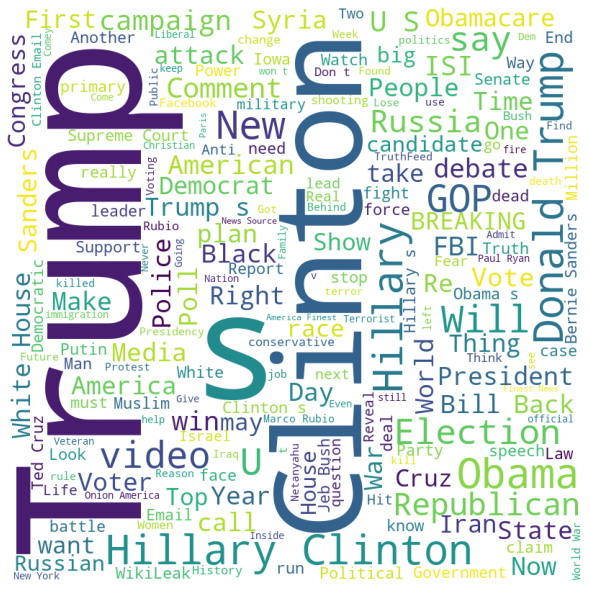

In [17]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


This appears to be political news articles.

Now lets see if there are some characteristics that are proper for fake news like a specific word...

In [18]:
fake_or_real_news.sample()

,Unnamed: 0,title,text,label
2498,1431,Democratic town hall: Will Clinton pitch backf...,Frida Ghitis is a world affairs columnist for ...,REAL


In [19]:
fake_news = fake_or_real_news[fake_or_real_news['label'] == 'FAKE']
fake_news

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
...,...,...,...,...
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE


In [20]:
# Create a string that contains all the titles in the DataFrame separated by spaces
fake_text = ' '.join(fake_news['text'].values)
print(type(fake_text))

<class 'str'>


In [21]:
# Create a WordCloud object and generate the word cloud

wordcloud_fake = WordCloud(width=800, height=800, background_color='white', max_words=200, contour_width=3, contour_color='steelblue')
wordcloud_fake.generate(fake_text)


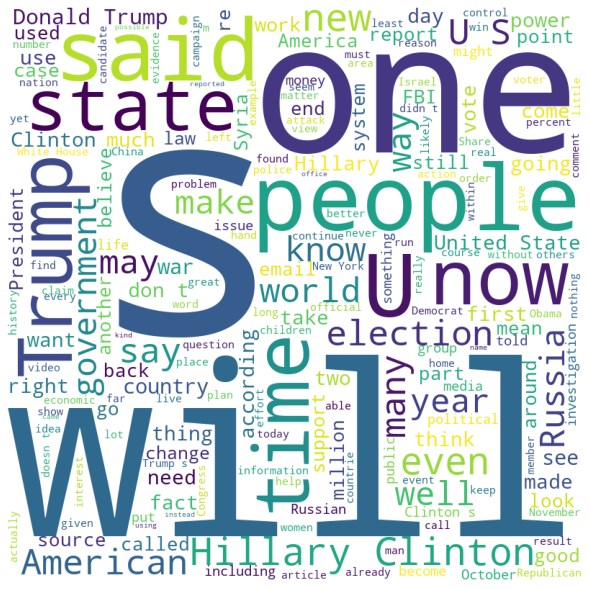

In [22]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_fake)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [23]:
real_news = fake_or_real_news[fake_or_real_news['label'] == 'REAL']
real_news

,Unnamed: 0,title,text,label
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL
...,...,...,...,...
6324,2316,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [24]:
# Create a string that contains all the titles in the DataFrame separated by spaces
real_text = ' '.join(real_news['text'].values)


In [25]:
# Create a WordCloud object and generate the word cloud

wordcloud_real = WordCloud(width=800, height=800, background_color='white', max_words=200, contour_width=3, contour_color='steelblue')
wordcloud_real.generate(real_text)


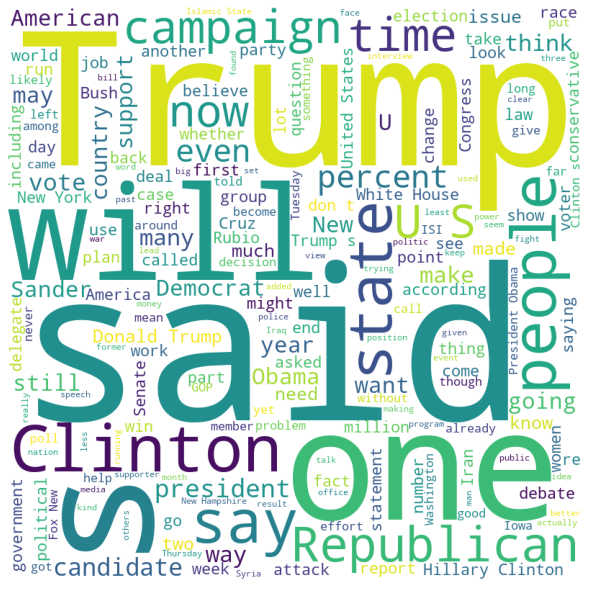

In [26]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_real)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

The wordclouds seperately for fake and real news are not that intuitive and specific. Words related to ploitics appear in both.

## Determine the label

In [27]:
# Label
# Let us create a series to store the label

y = fake_or_real_news.label
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [28]:
type(y)

pandas.core.series.Series

## Determine the features

In [29]:
# Feature

X = fake_or_real_news["text"] # other columns don't look quite useful
X

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

## Split data into training and test sets

In [30]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

The train_test_split function takes in two arrays X and y, which correspond to the features and label (target variable), respectively. It splits the data into two sets, a training set and a testing set, using the test_size argument. In this case, test_size=0.33 means that 33% of the data will be used for testing and the remaining 67% will be used for training.

The random_state argument is used to set the random seed for the splitting process, which ensures that the same split is made each time the code is run. In this case, the random seed is set to 53.

So, the code creates 4 datasets: X_train and y_train will be used for training the machine learning model, while X_test and y_test will be used for evaluating the performance of the model.

Let's verify the 4 datasets that the code created.

In [31]:
X_train

2576                                                     
1539    Report Copyright Violation Do you think there ...
5163    The election in 232 photos, 43 numbers and 131...
2615    Email Ever wonder what’s on the mind of today’...
4270    Wells Fargo is Rotting from the Top Down Wells...
                              ...                        
662     —Debby Borza stood before a wall of photos of ...
3261    Presumptive Republican nominee Donald Trump ha...
5883    December's job growth numbers are in, and they...
2933    In a wide-ranging discussion, Trump also said ...
797     Top officials of the Cruz campaign are convinc...
Name: text, Length: 4244, dtype: object

In [32]:
y_train

2576    FAKE
1539    FAKE
5163    REAL
2615    FAKE
4270    FAKE
        ... 
662     REAL
3261    REAL
5883    REAL
2933    REAL
797     REAL
Name: label, Length: 4244, dtype: object

In [33]:
X_test

4221    Donald Trump threatened to sue the New York Ti...
1685    Planned Parenthood: Abortion pill usage now ri...
3348    In a last dash, final "hail mary" attempt to e...
2633    Washington (CNN) Donald Trump and Ben Carson n...
975     The Obama administration announced Friday it w...
                              ...                        
3888    In a marketing fiasco that could rank right up...
2015    Email \nThe Politico/Morning Consult Poll find...
5860    The Maryland Democrat made the announcement Mo...
3071    Prev post Page 1 of 4 Next \nWhen most people ...
4284    The Bushes are burning as they consume the new...
Name: text, Length: 2091, dtype: object

In [34]:
y_test

4221    REAL
1685    FAKE
3348    REAL
2633    REAL
975     REAL
        ... 
3888    REAL
2015    FAKE
5860    REAL
3071    FAKE
4284    REAL
Name: label, Length: 2091, dtype: object

In [35]:
X_train.shape, X_test.shape

((4244,), (2091,))

In [36]:
y_train.shape, y_test.shape

((4244,), (2091,))

## Feature Engineering

Machine learning algorithms require numerical input. But text data is typically stored as a sequence of characters or words and this form is not suitable for use with machine learning algorithms.

Feature engineering, which is an important step in the process of building a machine learning model with NLP data, involves transforming raw text data into a numerical representation that can be used as input to the machine learning algorithms. 

Machine learning algorithms operate on numerical data, so transforming raw text data into a numerical representation is necessary in order to use the data as input to these algorithms.

In this project, we will be using CountVectorizer and TfidfVectorizer techniques to convert a collection of text documents into numerical feature vectors.


### CountVectorizer

CountVectorizer is a technique used in NLP to convert a collection of text documents into numerical feature vectors. 

It performs two main tasks: 
- tokenization
- counting

Tokenization is the process of breaking down a sentence into smaller units called tokens, which can be words or phrases. The CountVectorizer creates a vocabulary of all the unique tokens in the text data and then uses this vocabulary to build a numerical feature vector for each document.

Counting involves counting the number of occurrences of each token in each document. The resulting feature vectors are then a matrix, where each row represents a document, and each column represents a token from the vocabulary. The value in each cell represents the count of that token in the corresponding document.

CountVectorizer is used as a preprocessing step for text classification tasks in NLP.

### TfidfVectorizer

TfidfVectorizer is another technique used in NLP for converting a collection of text documents into numerical feature vectors. It extends the CountVectorizer method by taking into account the term frequency-inverse document frequency (TF-IDF) of each token in the text data.

The term frequency (TF) is the number of times a token appears in a document. The inverse document frequency (IDF) is a measure of how important a token is in the entire text data. Tokens that appear frequently in many documents have a low IDF score, while tokens that appear rarely have a high IDF score.

TfidfVectorizer combines these two measures to assign a weight to each token in each document. The resulting feature vectors are then a matrix, where each row represents a document, and each column represents a token from the vocabulary. The value in each cell represents the TF-IDF weight of that token in the corresponding document.

TfidfVectorizer is often used as a preprocessing step for text classification tasks in NLP, especially when the goal is to prioritize the most meaningful and relevant words in the text data.

The TfidfVectorizer method includes the functionality of CountVectorizer, so it can be used as a standalone method to convert text data into numerical feature vectors.


In summary, both techniques - CountVectorizer and TfidfVectorizer convert text data into numerical feature vectors, but TfidfVectorizer gives more weight to the tokens that are more important and relevant in the text data, whereas CountVectorizer only counts the occurrences of each token.

Reference:
    
https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558

Now let us look at the code to create supervised learning data from text. This step is also known as feature engineering.

## CountVectorizer for text classification

In [37]:
X_train

2576                                                     
1539    Report Copyright Violation Do you think there ...
5163    The election in 232 photos, 43 numbers and 131...
2615    Email Ever wonder what’s on the mind of today’...
4270    Wells Fargo is Rotting from the Top Down Wells...
                              ...                        
662     —Debby Borza stood before a wall of photos of ...
3261    Presumptive Republican nominee Donald Trump ha...
5883    December's job growth numbers are in, and they...
2933    In a wide-ranging discussion, Trump also said ...
797     Top officials of the Cruz campaign are convinc...
Name: text, Length: 4244, dtype: object

In [38]:
X_test

4221    Donald Trump threatened to sue the New York Ti...
1685    Planned Parenthood: Abortion pill usage now ri...
3348    In a last dash, final "hail mary" attempt to e...
2633    Washington (CNN) Donald Trump and Ben Carson n...
975     The Obama administration announced Friday it w...
                              ...                        
3888    In a marketing fiasco that could rank right up...
2015    Email \nThe Politico/Morning Consult Poll find...
5860    The Maryland Democrat made the announcement Mo...
3071    Prev post Page 1 of 4 Next \nWhen most people ...
4284    The Bushes are burning as they consume the new...
Name: text, Length: 2091, dtype: object

In [39]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english') # stop words are removed

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [40]:
count_train

<4244x56922 sparse matrix of type '<class 'numpy.int64'>'
	with 1119820 stored elements in Compressed Sparse Row format>

In [44]:
count_train.shape

(4244, 56922)

In [41]:
count_test

<2091x56922 sparse matrix of type '<class 'numpy.int64'>'
	with 533697 stored elements in Compressed Sparse Row format>

In [45]:
count_test.shape

(2091, 56922)

Note:
    
CountVectorizer, which is a class in the Python library scikit-learn, has converted a collection of text documents to a matrix of token counts (this is often used as a step in the process of preparing text data for use in machine learning models, specifically in text classification)

The output is a sparse matrix in the COOrdinate format, which can then be used as input for text classification models.

It's important to use the transform method instead of fit_transform for the test data, as the fit_transform method would fit a new vocabulary from the test data, which would compromise the evaluation of the model as the model would have seen the test data during the training phase.

The get_feature_names method returns a list of all the feature names (i.e., the words) in the vocabulary learned by the count_vectorizer object. This list is ordered by the vocabulary index, meaning that the first word in the list is assigned an index of 0, the second word an index of 1, and so on. This is a common way to inspect the vocabulary learned by the CountVectorizer object and ensure that it has learned a reasonable vocabulary from the text data.

### sparse matrix 

Sparse matrices are often used in mathematical and computational applications where the number of non-zero elements is relatively small compared to the size of the matrix. For example, in natural language processing, the feature representation of text data is often in the form of a sparse matrix, where the vast majority of the elements are zero, because only a small fraction of the words in the vocabulary appear in each document.

sparse matrix  is a matrix in which most of the elements are zero. In other words, a sparse matrix is a matrix that has a large number of zero values compared to the number of non-zero values.

In [46]:
# print(X_train.values)
# These values correspond to the text data that will be transformed into a numerical representation

In [47]:
count_train.A # The values can be accessed by using the .A attribute

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
count_test.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
type(count_train)

scipy.sparse._csr.csr_matrix

In [50]:
type(count_test)

scipy.sparse._csr.csr_matrix

## TfidfVectorizer for text classification

In [51]:
# Creating tf-idf vectors for the documents

# Initialize a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')

The max_df parameter is set to 0.7, which means that words that have a document frequency (i.e., the number of documents that a word appears in) greater than 0.7 will be ignored by the TfidfVectorizer. This parameter is used to reduce the dimensionality of the numerical representation by ignoring words that occur too frequently in the text data.

In [53]:
# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [54]:
tfidf_train

<4244x56922 sparse matrix of type '<class 'numpy.float64'>'
	with 1119820 stored elements in Compressed Sparse Row format>

In [55]:
tfidf_test

<2091x56922 sparse matrix of type '<class 'numpy.float64'>'
	with 533697 stored elements in Compressed Sparse Row format>

In [56]:
tfidf_train.shape

(4244, 56922)

In [57]:
tfidf_test.shape

(2091, 56922)

In [58]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Inspecting the vectors

In [59]:
count_train

<4244x56922 sparse matrix of type '<class 'numpy.int64'>'
	with 1119820 stored elements in Compressed Sparse Row format>

In [60]:
count_vectorizer

CountVectorizer(stop_words='english')

In [61]:
tfidf_train

<4244x56922 sparse matrix of type '<class 'numpy.float64'>'
	with 1119820 stored elements in Compressed Sparse Row format>

In [62]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.7, stop_words='english')

#### Create a dataframe from CountVectorizer and TfidfVectorizer

In [63]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,0.0,0.014123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4240,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4241,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4242,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


The difference between the sets of column names in count_df and tfidf_df is an empty set, meaning that both dataframes have exactly the same columns. 

In [66]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False


## Training and testing a classification model with scikit-learn

Now let us use the features we have extracted above to train and test a supervised classification model.

## Naive Bayes model for text classification

Naive Bayes is a simple and effective method for text classification tasks, such as identifying fake news. It makes the assumption that the features (in this case, the words in the news article) are independent of one another, which simplifies the computation and allows for fast training and classification. Additionally, Naive Bayes has been shown to perform well on a variety of text classification tasks and requires relatively little data to train. These properties make it a good choice for a fake news classifier.

It is based on Bayes' theorem, which states that the probability of an event (in this case, a news article being fake) can be determined by the probabilities of certain features (in this case, the words in the article) occurring.

The basic idea behind Naive Bayes is that it uses the probabilities of certain words occurring in fake news articles to classify new articles as fake or not. It starts by training the algorithm on a dataset of labeled news articles (fake or not), and using that training data to estimate the probability of each word occurring in a fake news article.

Once the algorithm is trained, when a new article is encountered, the algorithm uses the probabilities of each word in the article to estimate the probability that the article is fake. It then classifies the article as fake if the probability is greater than a certain threshold, otherwise it classifies it as not fake.

The "Naive" part of the name comes from the fact that the algorithm makes the assumption that the words in the article are independent of each other, which is not always the case in natural language. Despite this assumption, Naive Bayes can still perform well on text classification tasks.


## Naive Bayes with scikit-learn

#### Training and testing the "fake news" model with CountVectorizer

In [67]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()
nb_classifier

MultinomialNB()

In [68]:
# CountVectorizer with a Naive Bayes model

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [69]:
# Create the predicted tags
nb_cv_pred = nb_classifier.predict(count_test)
nb_cv_pred

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [70]:
type(nb_cv_pred)

numpy.ndarray

In [71]:
nb_cv_pred.shape

(2091,)

In [72]:
# Calculate the accuracy score
nb_cv_score = metrics.accuracy_score(y_test, nb_cv_pred)
print(nb_cv_score)

0.893352462936394


In [73]:
# Calculate the confusion matrix
nb_cv_cm = metrics.confusion_matrix(y_test, nb_cv_pred, labels=['FAKE', 'REAL'])
print(nb_cv_cm)

[[ 865  143]
 [  80 1003]]


### Confusion matrix:

The confusion matrix is a table that is often used to describe the performance of a classification algorithm, typically used in supervised learning.

It is used to evaluate the accuracy of a classification model by comparing the predicted class labels with the true class labels. 
 
The confusion matrix is a table with two rows and two columns, or more in general, a matrix with n rows and n columns, where n is the number of classes. Each column of the matrix represents the instances in a predicted class, while each row represents the instances in an actual class (or vice versa). In binary classification problem, a common case, it shows the count of True Positives (TP), False Positives (FP), True negatives (TN) and False negatives (FN).

- True Positives (TPs): the number of positive examples that the model correctly classified as positive
- True Negatives (TNs): the number of negative examples that the model correctly classified as negative
- False Positives (FPs): the number of negative examples that the model incorrectly classified as positive (i.e. the negative examples that were falsely classified as “positive”)
- False Negatives (FNs): the number of positive examples that the model incorrectly classified as negative (i.e. the positive examples that were falsely classified as “negative”)

Resource:
https://plat.ai/blog/confusion-matrix-in-machine-learning/

#### Training and testing the "fake news" model with TfidfVectorizer

In [74]:
# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB()

In [75]:
# Create the predicted tags
nb_tf_pred = nb_classifier.predict(tfidf_test)
nb_tf_pred

array(['REAL', 'REAL', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [76]:
# Calculate the accuracy score
nb_tf_score = metrics.accuracy_score(y_test, nb_tf_pred)
print(nb_tf_score)

0.8565279770444764


In [78]:
# Calculate the confusion matrix
nb_tf_cm = metrics.confusion_matrix(y_test, nb_tf_pred, labels=['FAKE', 'REAL'])
print(nb_tf_cm)

[[ 739  269]
 [  31 1052]]


## Improving the model

Let us try tweaking alpha levels using the Tfidf vectors and see if it improves the model performance.

In [79]:
# Create the list of alphas
# These alphas will be used to adjust the smoothing parameter for the Naive Bayes model
alphas = np.arange(0, 1, 0.1)
alphas

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [80]:
# Define train_and_predict()

def train_and_predict(alpha):
    # Instantiate the classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy
    score = metrics.accuracy_score(y_test, pred)
    return score

In [81]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8813964610234337

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4
Score:  0.8857006217120995

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001


/Users/brindhamanivannan/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684



Now let us investigate what the model has learned.

Better performance: 

Alpha:  0.1

Score:  0.8976566236250598

## Inspecting the model

Now let us inspect what the model had learned.

In [83]:
## Obtain the class labels

class_labels = nb_classifier.classes_
class_labels

array(['FAKE', 'REAL'], dtype='<U4')

In [84]:
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()
feature_names[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

In [85]:
print(len(feature_names))

56922


Now let us understand the importance of each feature in classifying the text data. For that let us create a zipped array of the classifier coefficients with the feature names and sort them by the coefficients.

Classifier coefficients are parameters that are learned by a machine learning classifier to make predictions on new data. In other words, they are the weights assigned to each feature in the input data to produce a prediction for a target variable. The coefficients reflect the relative importance of each feature in making the prediction.

In [86]:
nb_classifier.coef_[0]

array([-10.86324617,  -8.55826243, -11.3163128 , ..., -11.3163128 ,
       -11.3163128 , -11.3163128 ])

In [94]:
type(nb_classifier.coef_[0])

numpy.ndarray

In [96]:
# Zip the feature names together with the coefficient array and sort by weights: feature_with_weights
feature_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))
feature_with_weights[:25]

[(-11.316312804238807, '0000'),
 (-11.316312804238807, '000035'),
 (-11.316312804238807, '0001'),
 (-11.316312804238807, '0001pt'),
 (-11.316312804238807, '000km'),
 (-11.316312804238807, '0011'),
 (-11.316312804238807, '006s'),
 (-11.316312804238807, '007'),
 (-11.316312804238807, '007s'),
 (-11.316312804238807, '008s'),
 (-11.316312804238807, '0099'),
 (-11.316312804238807, '00am'),
 (-11.316312804238807, '00p'),
 (-11.316312804238807, '00pm'),
 (-11.316312804238807, '014'),
 (-11.316312804238807, '015'),
 (-11.316312804238807, '018'),
 (-11.316312804238807, '01am'),
 (-11.316312804238807, '020'),
 (-11.316312804238807, '023'),
 (-11.316312804238807, '02welcome'),
 (-11.316312804238807, '031'),
 (-11.316312804238807, '032'),
 (-11.316312804238807, '0325'),
 (-11.316312804238807, '033')]

In [100]:
type(feature_with_weights)

list

In [102]:
len(feature_with_weights)

56922

Note:
    
The resulting list of tuples is sorted by the coefficients using the sorted() function. The sorting is done in ascending order, so the features with the smallest coefficients will be at the beginning of the list and the features with the largest coefficients will be at the end of the list.

In [103]:
max(feature_with_weights)

(-6.328486029596207, 'trump')

In [ ]:
min(feature_with_weights)

In [104]:
feature_with_weights[-25:]

[(-7.845060904296691, 'political'),
 (-7.78541075778168, 'presidential'),
 (-7.778694286740624, 'gop'),
 (-7.773203632418607, 'debate'),
 (-7.764499572026271, 'democratic'),
 (-7.742481952533027, 'states'),
 (-7.717550034444668, 'rubio'),
 (-7.703583809227384, 'voters'),
 (-7.654774992495461, 'house'),
 (-7.649398936153309, 'republicans'),
 (-7.6246184189367, 'bush'),
 (-7.616556675728881, 'percent'),
 (-7.545789237823644, 'people'),
 (-7.516447881078008, 'new'),
 (-7.448027933291952, 'party'),
 (-7.411148410203476, 'cruz'),
 (-7.410910239085596, 'state'),
 (-7.35748985914622, 'republican'),
 (-7.33649923948987, 'campaign'),
 (-7.2854057032685775, 'president'),
 (-7.2166878130917755, 'sanders'),
 (-7.108263114902301, 'obama'),
 (-6.724771332488041, 'clinton'),
 (-6.5653954389926845, 'said'),
 (-6.328486029596207, 'trump')]

This allows us to see which features are the most important for each class according to the model's coefficients. Also, this is useful for analyzing and interpreting the model, as it can give insight into which words or phrases the model is using to make its predictions, and how strongly it is considering each feature.

The coef_ attribute of a MultinomialNB classifier object contains the coefficients learned by the classifier during training. 

The coef_ attribute can be used to understand the importance of each feature in classifying the data and to gain insights into the decision making process of the classifier. For example, by accessing the coef_ attribute, one can see which features have the largest log probabilities for each class, indicating which features are most important in classifying the data.

Now let us try other classification models such as

- Support Vector Machine
- Random Forest
- Logistic Regression
- Passive Aggressive Classifier Algorithm


## Support Vector Machine

In [105]:
# Instantiate a SVM classifier
svm_classifier = SVC()
svm_classifier

# # CountVectorizer with a SVM model

# Fit the classifier to the training data
svm_classifier.fit(count_train, y_train)

# Create the predicted tags
svm_cv_pred = svm_classifier.predict(count_test)
print(svm_cv_pred)

# Calculate the accuracy score
svm_cv_score = metrics.accuracy_score(y_test, svm_cv_pred)
print(svm_cv_score)

# Calculate the confusion matrix
svm_cv_cm = metrics.confusion_matrix(y_test, svm_cv_pred, labels=['FAKE', 'REAL'])
print(svm_cv_cm)

['FAKE' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.8617886178861789
[[969  39]
 [250 833]]


In [106]:
# TfidfVectorizer with a SVM model

# Fit the classifier to the training data
svm_classifier.fit(tfidf_train, y_train)

# Create the predicted tags
svm_tf_pred = svm_classifier.predict(tfidf_test)
print(svm_tf_pred)

# Calculate the accuracy score
svm_tf_score = metrics.accuracy_score(y_test, svm_tf_pred)
print(svm_tf_score)

# Calculate the confusion matrix
svm_tf_cm = metrics.confusion_matrix(y_test, svm_tf_pred, labels=['FAKE', 'REAL'])
print(svm_tf_cm)

['REAL' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.9220468675274988
[[971  37]
 [126 957]]


## Random Forest

In [107]:
# Instantiate a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier

# Fit the classifier to the training data
rf_classifier.fit(count_train, y_train)

# Create the predicted tags
rf_cv_pred = rf_classifier.predict(count_test)
print(rf_cv_pred)

# Calculate the accuracy score
rf_cv_score = metrics.accuracy_score(y_test, rf_cv_pred)
print(rf_cv_score)

# Calculate the confusion matrix
rf_cv_cm = metrics.confusion_matrix(y_test, rf_cv_pred, labels=['FAKE', 'REAL'])
print(rf_cv_cm)

['FAKE' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.9024390243902439
[[913  95]
 [109 974]]


In [108]:
# TfidfVectorizer with a Random Forest model

# Fit the classifier to the training data
rf_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
rf_tf_pred = rf_classifier.predict(tfidf_test)
print(rf_tf_pred)

# Calculate the accuracy score: score
rf_tf_score = metrics.accuracy_score(y_test, rf_tf_pred)
print(rf_tf_score)

# Calculate the confusion matrix
rf_tf_cm = metrics.confusion_matrix(y_test, rf_tf_pred, labels=['FAKE', 'REAL'])
print(rf_tf_cm)

['FAKE' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.9010043041606887
[[918  90]
 [117 966]]


## Logistic Regression

In [109]:
# Instantiate a Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier

LogisticRegression()

In [110]:
# Fit the classifier to the training data
lr_classifier.fit(count_train, y_train)

AttributeError: 'str' object has no attribute 'decode'

Reference link to solve the above error: 

https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre

In [111]:
# CountVectorizer with a Logistic Regression model

# Instantiate a Logistic Regression classifier
lr_classifier = LogisticRegression(solver='liblinear')
lr_classifier

LogisticRegression(solver='liblinear')

In [112]:
# CountVectorizer with a Logistic Regression model

# Fit the classifier to the training data
lr_classifier.fit(count_train, y_train)

# Create the predicted tags
lr_cv_pred = lr_classifier.predict(count_test)
print(lr_cv_pred)

# Calculate the accuracy score
lr_cv_score = metrics.accuracy_score(y_test, lr_cv_pred)
print(lr_cv_score)

# Calculate the confusion matrix
lr_cv_cm = metrics.confusion_matrix(y_test, lr_cv_pred, labels=['FAKE', 'REAL'])
print(lr_cv_cm)

['REAL' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.9100908656145384
[[948  60]
 [128 955]]


In [113]:
# TfidfVectorizer with a Logistic Regression model

# Fit the classifier to the training data
lr_classifier.fit(tfidf_train, y_train)

# Create the predicted tags
lr_tf_pred = lr_classifier.predict(tfidf_test)
print(lr_tf_pred)

# Calculate the accuracy score
lr_tf_score = metrics.accuracy_score(y_test, lr_tf_pred)
print(lr_tf_score)

# Calculate the confusion matrix
lr_tf_cm = metrics.confusion_matrix(y_test, lr_tf_pred, labels=['FAKE', 'REAL'])
print(lr_tf_cm)

['REAL' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
0.9139167862266858
[[962  46]
 [134 949]]


## Passive Aggressive Classifier

In [114]:
# Instantiate the Passive Aggressive Classifier
pa_classifier = PassiveAggressiveClassifier(max_iter=50)

# CountVectorizer with a Passive Aggressive Classifier

# Fit the classifier to the training data
pa_classifier.fit(count_train,y_train)

# Create the predicted tags
pa_cv_pred = pa_classifier.predict(count_test)
print(pa_cv_pred)

# Calculate the accuracy score
pa_cv_score = metrics.accuracy_score(y_test, pa_cv_pred)
print("Accuracy: %0.3f"%pa_cv_score)

# Calculate the confusion matrix
pa_cv_cm = metrics.confusion_matrix(y_test, pa_cv_pred, labels=['FAKE', 'REAL'] )
print(pa_cv_cm)

['REAL' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
Accuracy: 0.893
[[908 100]
 [123 960]]


In [115]:
# TfidfVectorizer with a Passive Aggressive Classifier

# Fit the classifier to the training data
pa_classifier.fit(tfidf_train,y_train)

# Create the predicted tags
pa_tf_pred = pa_classifier.predict(tfidf_test)
print(pa_tf_pred)

# Calculate the accuracy score
pa_tf_score = metrics.accuracy_score(y_test, pa_tf_pred)
print("Accuracy: %0.3f"%pa_tf_score)

# Calculate the confusion matrix
pa_tf_cm = metrics.confusion_matrix(y_test, pa_tf_pred, labels=['FAKE', 'REAL'] )
print(pa_tf_cm)

['REAL' 'REAL' 'REAL' ... 'REAL' 'FAKE' 'REAL']
Accuracy: 0.935
[[ 951   57]
 [  79 1004]]


## Conclusion

We have build a simple model to classify fake news using the following supervised learning algorithms with NLP and compared the model performances.

- Naive Bayes
- Support Vector Machine
- Random Forest
- Logistic Regression
- Passive Aggressive Classifier Algorithm

TfidfVectorizer with a SVM model has a accuracy score of 92% and TfidfVectorizer with Passive Aggressive Classifier Algorithm has  accuracy score of 93%.
